# Assignment 2(due on 11/08)

## Student:陈泽鲲（12332289），Gtihub：Konstantiniyye1
## 批改人：张鹏


## 得分：50/50

### 1 Significant earthquakes since 2150 B.C.

In [1]:

# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
from statsmodels.graphics.api import qqplot
import scipy.stats as stats

In [2]:
#1.1

Sig_Eqs=pd.read_csv("earthquakes-2023-11-01_21-47-02_+0800.tsv",sep = "\t")

In [3]:
Sig_Eqs_1=Sig_Eqs[["Country","Deaths"]]
Sig_Eqs_1_sum=Sig_Eqs_1.groupby(['Country']).sum().sort_values("Deaths", ascending=False)
Sig_Eqs_1_sum.iloc[0:10]

,Deaths
Country,
CHINA,2075045.0
TURKEY,1188881.0
IRAN,1011449.0
ITALY,498478.0
SYRIA,439224.0
HAITI,323478.0
AZERBAIJAN,317219.0
JAPAN,279085.0
ARMENIA,191890.0


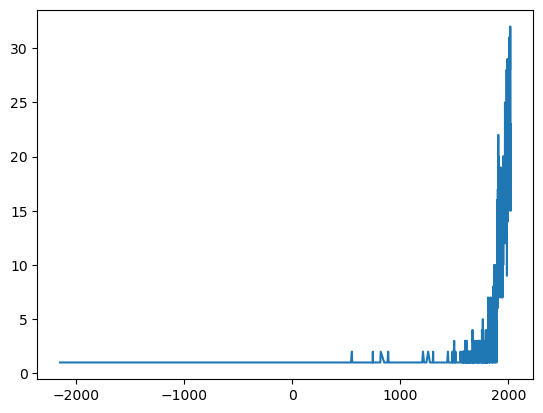

In [4]:
#1.2

Sig_Eqs_2=Sig_Eqs[["Year","Mag"]]
Sig_Eqs_2_new=Sig_Eqs_2.loc[Sig_Eqs_2["Mag"]>6.0]
Sig_Eqs_2_sum=Sig_Eqs_2_new.groupby(['Year']).count()
plt.plot(Sig_Eqs_2_sum)

In [5]:
#1.3

Sig_Eqs=Sig_Eqs.dropna(subset="Country")

In [6]:
def CountEq_LargestEq(country, Sig_Eqs):
    Sig_Eqs_new=Sig_Eqs[["Year","Mo","Dy","Country","Mag"]]
    Sig_Eqs_count=Sig_Eqs_new.groupby(['Country']).count()['Year']
    Sig_Eqs_count=Sig_Eqs_count.rename('Count')
    Sig_Eqs_max=Sig_Eqs_new.groupby(['Country']).max()['Mag']
    Date=Sig_Eqs_new.loc[(Sig_Eqs_new['Country']==country) & (Sig_Eqs_new['Mag']==Sig_Eqs_max.loc[country])]
    Data=pd.merge(Date,Sig_Eqs_count,on=['Country'])
    return Data

In [7]:
Data=CountEq_LargestEq("CHINA", Sig_Eqs)
Data

,Year,Mo,Dy,Country,Mag,Count
0,1668.0,7.0,25.0,CHINA,8.5,620


In [8]:
Sig_Eqs_3=Sig_Eqs['Country']
Sig_Eqs_3=Sig_Eqs_3.drop_duplicates()
Sig_Eqs_3.reset_index(drop=True, inplace=True)
Data=CountEq_LargestEq(Sig_Eqs_3[0], Sig_Eqs)
for i in range(1,Sig_Eqs_3.size):
    Data_new=CountEq_LargestEq(Sig_Eqs_3[i], Sig_Eqs)
    Data=pd.concat([Data,Data_new])
Data=Data.sort_values("Count", ascending=False)
Data.reset_index(drop=True, inplace=True)
Data

,Year,Mo,Dy,Country,Mag,Count
0,1668.0,7.0,25.0,CHINA,8.5,620
1,2011.0,3.0,11.0,JAPAN,9.1,414
2,2004.0,12.0,26.0,INDONESIA,9.1,411
3,856.0,12.0,22.0,IRAN,7.9,384
4,2023.0,2.0,6.0,TURKEY,7.8,335
...,...,...,...,...,...,...
164,1921.0,9.0,16.0,CENTRAL AFRICAN REPUBLIC,4.8,1
165,1819.0,8.0,31.0,NORWAY,5.8,1
166,1914.0,10.0,23.0,PALAU,7.6,1
167,1848.0,7.0,12.0,FRENCH POLYNESIA,6.5,1


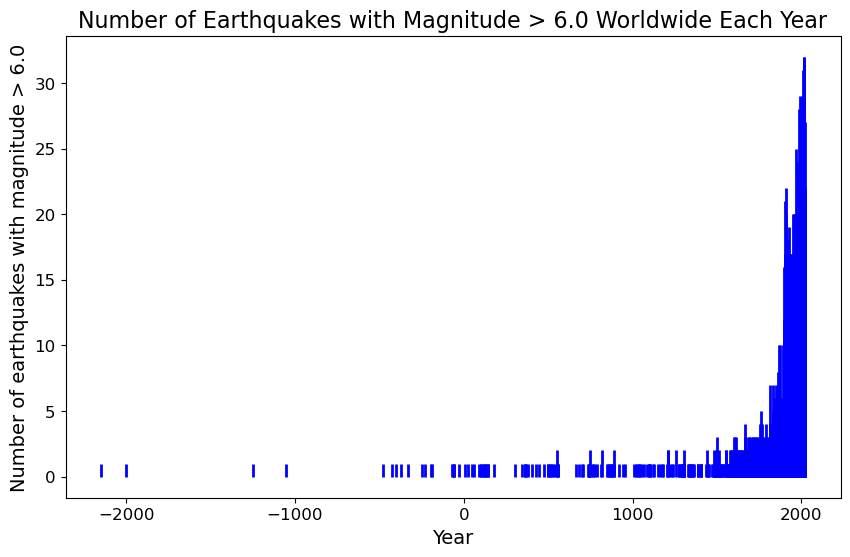

In [24]:
#1.2 助教添加
# 筛选出震级大于6.0的地震
large_quakes = Sig_Eqs[Sig_Eqs['Mag'] > 6.0]

# 按年份对数据进行分组，并得到每年的地震次数
quakes_by_year = large_quakes.groupby('Year')['Mag'].count()

plt.figure(figsize=(10, 6))
plt.vlines(quakes_by_year.index, ymin=0, ymax=quakes_by_year.values, color='blue', linewidth=2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of earthquakes with magnitude > 6.0', fontsize=14)
plt.title('Number of Earthquakes with Magnitude > 6.0 Worldwide Each Year', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)

# Displaying the plot
plt.show()

### 第一题代码运行正常，可以输出正确结果，报告中也展示了输出内容，也针对问题给出文字分析 第二问绘图有一点点问题，建议绘制竖线图，见上面代码助教添加代码


### 得分：24/25
### --------------------------------------------------------------------------------------------

###  2. Wind speed in Shenzhen during the past 10 years

In [9]:
wind=pd.read_csv('2281305.csv')
wind=wind[['DATE','WND']]
wind[['direction','direction_code','type','speed','speed_code']]=wind.WND.str.split(',',expand=True)
wind.drop(columns = 'WND',inplace=True)
wind['speed']=wind['speed'].astype(float)
wind

/tmp/ipykernel_410526/590818858.py:1: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  wind=pd.read_csv('2281305.csv')


,DATE,direction,direction_code,type,speed,speed_code
0,2010-01-02T00:00:00,040,1,N,20.0,1
1,2010-01-02T01:00:00,999,9,V,10.0,1
2,2010-01-02T02:00:00,999,9,C,0.0,1
3,2010-01-02T03:00:00,140,1,N,10.0,1
4,2010-01-02T04:00:00,300,1,N,40.0,1
...,...,...,...,...,...,...
111979,2020-09-11T17:00:00,170,1,N,30.0,1
111980,2020-09-11T18:00:00,180,1,N,40.0,1
111981,2020-09-11T19:00:00,220,1,V,30.0,1
111982,2020-09-11T20:00:00,260,1,N,30.0,1


In [10]:
wind=wind.loc[wind['speed']!=9999]
wind['DATE']=pd.to_datetime(wind['DATE'])
wind['YYYY-MM']=wind['DATE'].dt.to_period('M')
wind.set_index('DATE',drop=True, inplace=True)
wind

/tmp/ipykernel_410526/2021091664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['DATE']=pd.to_datetime(wind['DATE'])
/tmp/ipykernel_410526/2021091664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind['YYYY-MM']=wind['DATE'].dt.to_period('M')


,direction,direction_code,type,speed,speed_code,YYYY-MM
DATE,,,,,,
2010-01-02 00:00:00,040,1,N,20.0,1,2010-01
2010-01-02 01:00:00,999,9,V,10.0,1,2010-01
2010-01-02 02:00:00,999,9,C,0.0,1,2010-01
2010-01-02 03:00:00,140,1,N,10.0,1,2010-01
2010-01-02 04:00:00,300,1,N,40.0,1,2010-01
...,...,...,...,...,...,...
2020-09-11 17:00:00,170,1,N,30.0,1,2020-09
2020-09-11 18:00:00,180,1,N,40.0,1,2020-09
2020-09-11 19:00:00,220,1,V,30.0,1,2020-09


Text(0, 0.5, 'wind speed(m$^2$)')

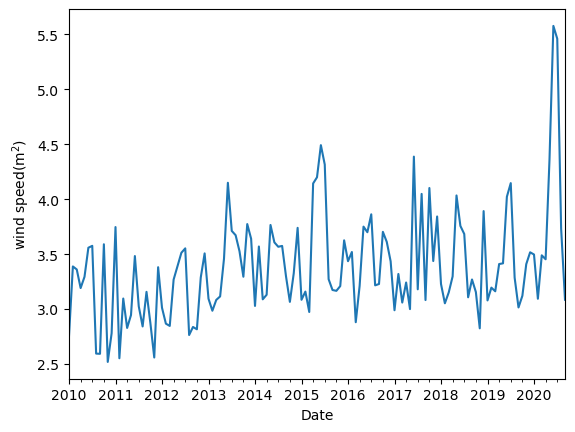

In [11]:
wind_mon=wind[['YYYY-MM','speed']].groupby(['YYYY-MM']).mean()/10
wind_mon['speed'].plot()
plt.xlabel('Date')
plt.ylabel('wind speed(m$^2$)')

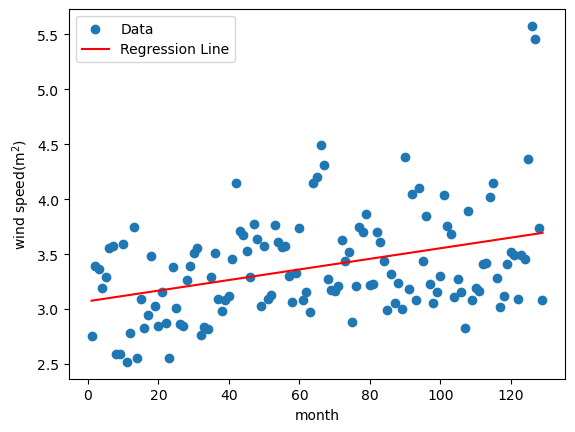

In [12]:
y=wind_mon['speed'].to_numpy()
x=np.linspace(1,y.size,y.size)
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.scatter(x, y, label='Data') 
plt.plot(x, intercept + slope * x, color='red', label='Regression Line') 
plt.xlabel('month')
plt.ylabel('wind speed(m$^2$)')
plt.legend()
plt.show()

In [13]:
print(f"Slope (斜率): {slope}")
print(f"Intercept (截距): {intercept}")
print(f"R-squared (相关系数的平方): {r_value**2}")
print(f"P-value (p-值): {p_value}")

Slope (斜率): 0.00481813862880326
Intercept (截距): 3.071759331411062
R-squared (相关系数的平方): 0.13543029389763156
P-value (p-值): 1.7814607055107157e-05


### 第二题代码运行正常，可以输出正确结果。报告中展现了代码和结果，以及对总体趋势的描述。加入了线性拟合分析。

### 得分11/10
### ---------------------------------------------------------------------------------------------

###  3. Explore a data set

In [14]:
#3.1
NOx=pd.read_csv('01389005.csv')
NOx

,Unnamed: 0,agency_cd,site_no,Date,X_.from.right.intake_99133_00003,X_.from.right.intake_99133_00003_cd,X_.from.left.intake_99133_00003,X_.from.left.intake_99133_00003_cd
0,1,USGS,1389005,2009-07-30,1.76,A,1.08,A
1,2,USGS,1389005,2009-07-31,1.41,A,0.99,A
2,3,USGS,1389005,2009-08-01,1.34,A,0.93,A
3,4,USGS,1389005,2009-08-02,1.05,A,0.90,A
4,5,USGS,1389005,2009-08-03,0.88,A,0.80,A
...,...,...,...,...,...,...,...,...
4778,4779,USGS,1389005,2023-10-06,0.64,P,1.12,P
4779,4780,USGS,1389005,2023-10-07,0.77,P,1.07,P
4780,4781,USGS,1389005,2023-10-08,0.98,P,1.00,P
4781,4782,USGS,1389005,2023-10-09,0.98,P,0.96,P


In [15]:
NOx=NOx.dropna(subset=["X_.from.right.intake_99133_00003","X_.from.left.intake_99133_00003"])
NOx=NOx.loc[NOx["X_.from.right.intake_99133_00003"]!= -999999]
NOx=NOx.loc[NOx["X_.from.left.intake_99133_00003"]!= -999999]
NOx=NOx.loc[NOx["X_.from.right.intake_99133_00003_cd"] != "A <"]
NOx=NOx.loc[NOx["X_.from.left.intake_99133_00003_cd"] != "A <"]
NOx.rename(columns={"X_.from.right.intake_99133_00003": "rightintake"}, inplace=True)
NOx.rename(columns={"X_.from.left.intake_99133_00003": "leftintake"}, inplace=True)
NOx.rename(columns={"X_.from.right.intake_99133_00003_cd": "rightintake_cd"}, inplace=True)
NOx.rename(columns={"X_.from.left.intake_99133_00003_cd": "leftintake_cd"}, inplace=True)
NOx

,Unnamed: 0,agency_cd,site_no,Date,rightintake,rightintake_cd,leftintake,leftintake_cd
0,1,USGS,1389005,2009-07-30,1.76,A,1.08,A
1,2,USGS,1389005,2009-07-31,1.41,A,0.99,A
2,3,USGS,1389005,2009-08-01,1.34,A,0.93,A
3,4,USGS,1389005,2009-08-02,1.05,A,0.90,A
4,5,USGS,1389005,2009-08-03,0.88,A,0.80,A
...,...,...,...,...,...,...,...,...
4778,4779,USGS,1389005,2023-10-06,0.64,P,1.12,P
4779,4780,USGS,1389005,2023-10-07,0.77,P,1.07,P
4780,4781,USGS,1389005,2023-10-08,0.98,P,1.00,P
4781,4782,USGS,1389005,2023-10-09,0.98,P,0.96,P


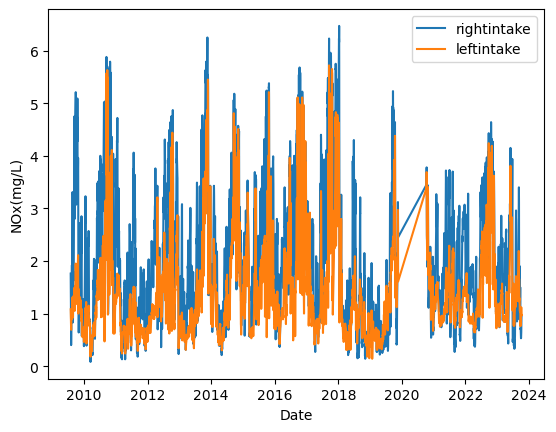

In [16]:
#3.2
NOx['Date']=pd.to_datetime(NOx['Date'])
plt.plot(NOx['Date'],NOx['rightintake'])
plt.plot(NOx['Date'],NOx['leftintake'])
plt.xlabel('Date')
plt.ylabel('NOx(mg/L)')
plt.legend(['rightintake','leftintake'])

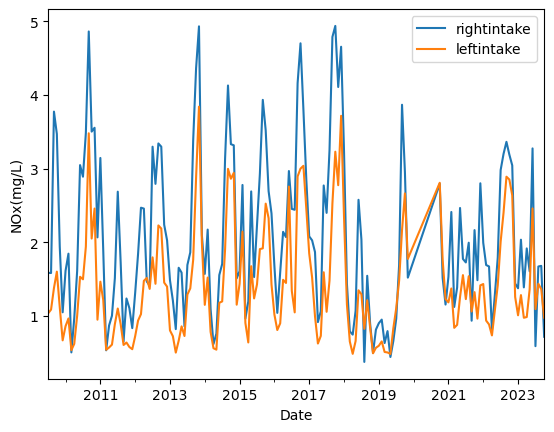

In [17]:
#3.3
NOx['YYYY-MM']=NOx['Date'].dt.to_period('M')
NOx_mon=NOx[['YYYY-MM','rightintake','leftintake']].groupby(['YYYY-MM']).mean()
NOx_mon.plot()
plt.xlabel('Date')
plt.ylabel('NOx(mg/L)')
plt.legend(['rightintake','leftintake'])


In [18]:
NOx[['rightintake','leftintake']].describe()


,rightintake,leftintake
count,4698.000000,4698.00000
mean,2.084985,1.42262
std,1.297827,0.88544
min,0.080000,0.14000
25%,1.050000,0.81000
50%,1.810000,1.19000
75%,2.940000,1.74000
max,6.470000,5.72000


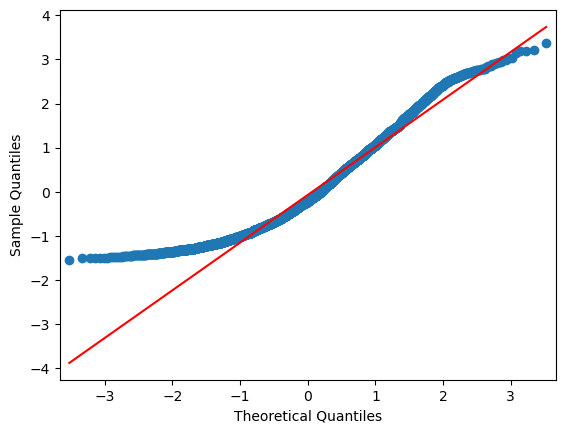

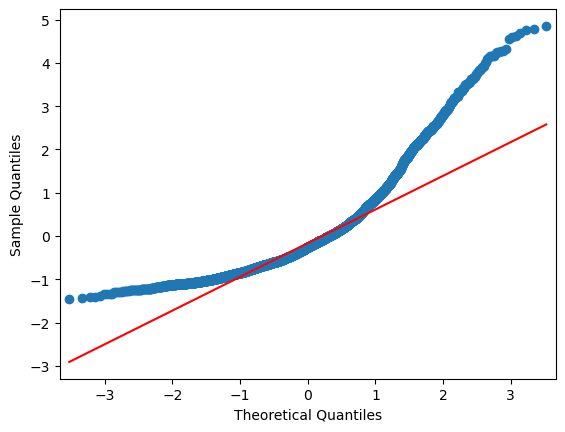

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(NOx['rightintake'], line="q", ax=ax, fit=True)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(NOx['leftintake'], line="q", ax=ax, fit=True)
plt.show()

(array([ 319., 1133., 1062.,  831.,  432.,  318.,  180.,  117.,  114.,
          77.,   43.,   34.,   18.,   13.,    7.]),
 array([0.14 , 0.512, 0.884, 1.256, 1.628, 2.   , 2.372, 2.744, 3.116,
        3.488, 3.86 , 4.232, 4.604, 4.976, 5.348, 5.72 ]),
 <BarContainer object of 15 artists>)

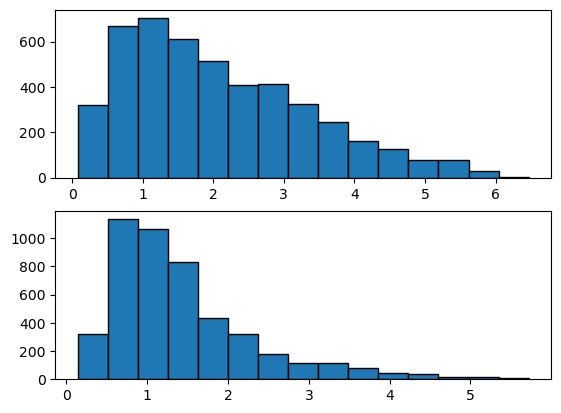

In [20]:
plt.subplot(211)
plt.hist(NOx["rightintake"], bins=15, edgecolor='black')
plt.subplot(212)
plt.hist(NOx["leftintake"], bins=15, edgecolor='black')

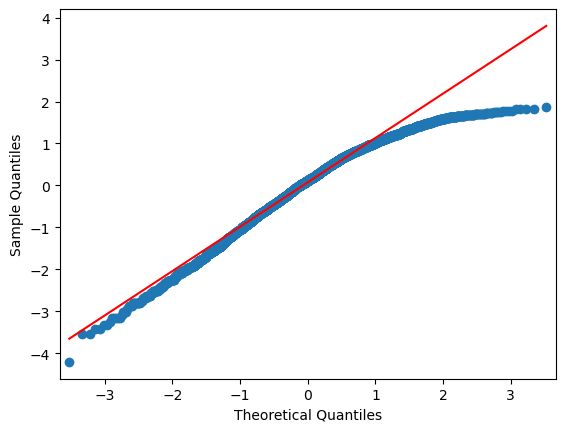

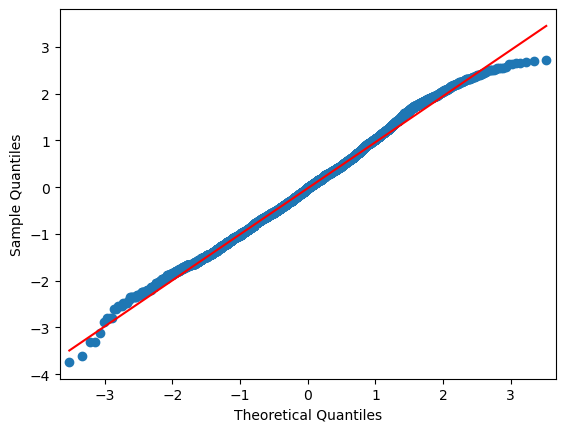

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(np.log(NOx['rightintake']), line="q", ax=ax, fit=True)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
fig = qqplot(np.log(NOx['leftintake']), line="q", ax=ax, fit=True)
plt.show()

(array([  2.,   3.,  13.,  48., 182., 325., 549., 760., 737., 793., 492.,
        363., 239., 144.,  48.]),
 array([-1.96611286, -1.71877408, -1.4714353 , -1.22409652, -0.97675775,
        -0.72941897, -0.48208019, -0.23474141,  0.01259736,  0.25993614,
         0.50727492,  0.7546137 ,  1.00195247,  1.24929125,  1.49663003,
         1.74396881]),
 <BarContainer object of 15 artists>)

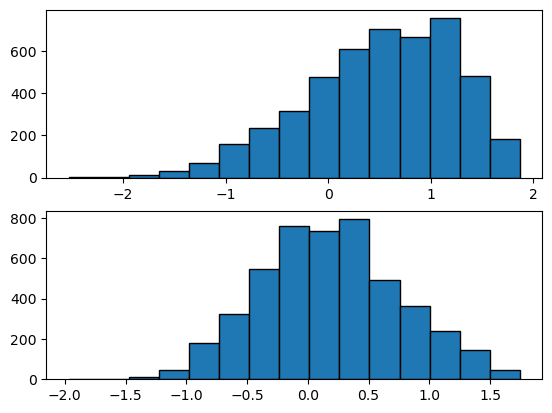

In [22]:
plt.subplot(211)
plt.hist(np.log(NOx["rightintake"]), bins=15, edgecolor='black')
plt.subplot(212)
plt.hist(np.log(NOx["leftintake"]), bins=15, edgecolor='black')

In [23]:

NOx[['rightintake','leftintake']].corr(method="pearson")

,rightintake,leftintake
rightintake,1.000000,0.796005
leftintake,0.796005,1.000000


### 第三题代码输出结果正确，也在报告中展现了输出结果和相应的分析
### 得分15/15
